색상: (12, 13, 31), 비율: 2.06%
색상: (11, 12, 30), 비율: 0.92%
색상: (14, 13, 31), 비율: 0.76%
색상: (11, 14, 31), 비율: 0.72%
색상: (13, 12, 30), 비율: 0.72%


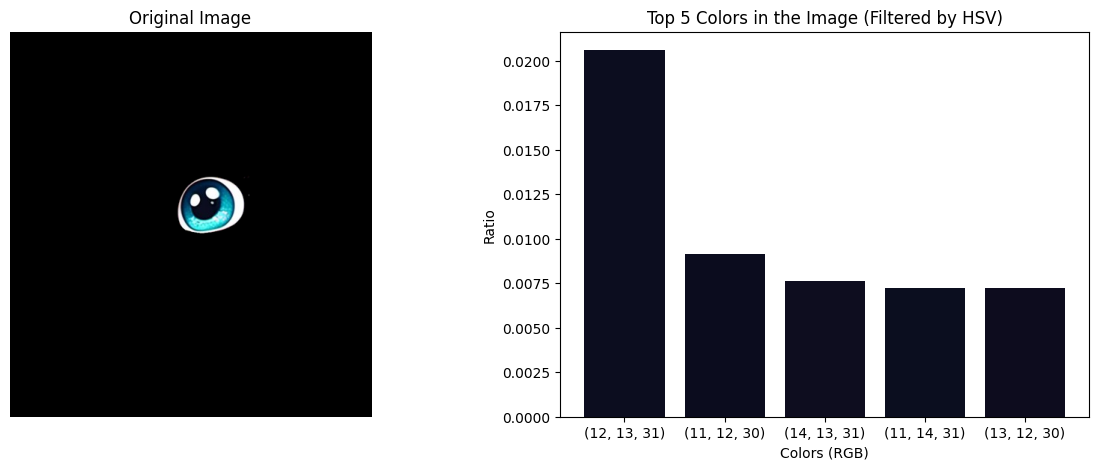

In [ ]:
# 픽셀단위로 했을때 문제점 예시

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2  # OpenCV 라이브러리
from collections import Counter

# 이미지 경로
image_path = '/content/sns-removebg-preview.png'

# 이미지 불러오기
image = Image.open(image_path)
image = image.convert('RGB')
image_np = np.array(image)

# 이미지 BGR로 변환 (OpenCV에서 사용하기 위해)
image_bgr = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

# BGR 이미지를 HSV로 변환
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# HSV에서 밝기(V)와 채도(S)의 범위를 설정해 너무 어둡거나 밝은 픽셀을 제외
lower_bound = np.array([0, 30, 30])  # 최소 채도(S)와 밝기(V) 설정
upper_bound = np.array([180, 255, 220])  # 최대 밝기(V) 설정

# 해당 범위 내의 색상만 마스크 생성
mask = cv2.inRange(image_hsv, lower_bound, upper_bound)

# 마스크를 사용하여 해당 영역의 픽셀만 추출
masked_pixels = image_np[mask != 0]  # 마스크가 0이 아닌 부분의 픽셀만 추출

# 각 색상의 픽셀 수 계산
color_counts = Counter(map(tuple, masked_pixels))
total_pixels = sum(color_counts.values())

# 색상 비율 계산
color_ratios = {color: count / total_pixels for color, count in color_counts.items()}

# 비율에 따라 내림차순 정렬 후 상위 5개 색상 추출
color_ratios_sorted = dict(sorted(color_ratios.items(), key=lambda x: x[1], reverse=True)[:5])

# 결과 출력
for color, ratio in color_ratios_sorted.items():
    print(f'색상: {color}, 비율: {ratio:.2%}')

# 시각화: 원본 이미지와 상위 5개 색상 그래프
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# 원본 이미지 표시
axs[0].imshow(image)
axs[0].axis('off')
axs[0].set_title('Original Image')

# 상위 5개 색상 시각화
colors = list(color_ratios_sorted.keys())
ratios = list(color_ratios_sorted.values())
hex_colors = ['#%02x%02x%02x' % color for color in colors]

axs[1].bar(range(len(colors)), ratios, color=hex_colors)
axs[1].set_xticks(range(len(colors)))
axs[1].set_xticklabels([str(color) for color in colors])
axs[1].set_xlabel('Colors (RGB)')
axs[1].set_ylabel('Ratio')
axs[1].set_title('Top 5 Colors in the Image (Filtered by HSV)')

plt.show()


색상: (192, 190, 208), 비율: 38.60%
색상: (157, 157, 186), 비율: 34.14%
색상: (132, 130, 160), 비율: 15.87%
색상: (100, 97, 123), 비율: 8.42%
색상: (45, 44, 56), 비율: 2.97%


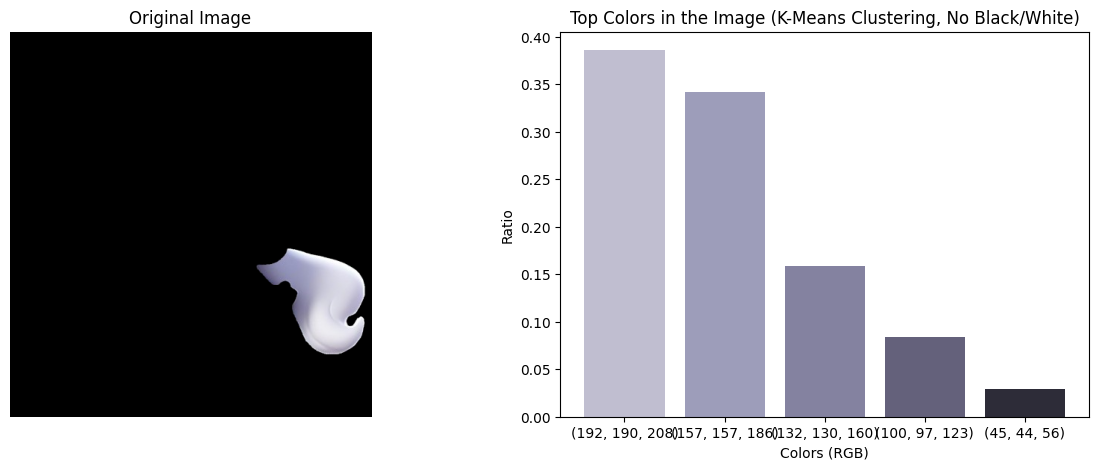

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 이미지 경로
image_path = '/content/머리-removebg-preview.png'

# 이미지 불러오기
image = Image.open(image_path)
image = image.convert('RGB')
image_np = np.array(image)

# 이미지의 모든 픽셀 추출
pixels = image_np.reshape(-1, 3)

# 검은색과 흰색 계열을 제외한 픽셀 추출
non_black_white_pixels = pixels[
    ((pixels[:, 0] > 30) | (pixels[:, 1] > 30) | (pixels[:, 2] > 30)) &  # 어두운 색상 제외
    ((pixels[:, 0] < 220) & (pixels[:, 1] < 220) & (pixels[:, 2] < 220))  # 밝은 색상 제외
]

# 클러스터링을 통한 주요 색상 추출 (K-Means)
num_clusters = 5  # 추출할 주요 색상의 수
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(non_black_white_pixels)

# 클러스터의 중심점 (주요 색상)
colors = kmeans.cluster_centers_.astype(int)

# 각 클러스터의 비율 계산
labels, counts = np.unique(kmeans.labels_, return_counts=True)
color_ratios = {tuple(colors[i]): count / len(non_black_white_pixels) for i, count in zip(labels, counts)}

# 비율에 따라 정렬
color_ratios_sorted = dict(sorted(color_ratios.items(), key=lambda x: x[1], reverse=True))

# 결과 출력
for color, ratio in color_ratios_sorted.items():
    print(f'색상: {color}, 비율: {ratio:.2%}')

# 시각화: 원본 이미지와 주요 색상 그래프
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# 원본 이미지 표시
axs[0].imshow(image)
axs[0].axis('off')
axs[0].set_title('Original Image')

# 주요 색상 시각화
colors_list = list(color_ratios_sorted.keys())
ratios = list(color_ratios_sorted.values())
hex_colors = ['#%02x%02x%02x' % color for color in colors_list]

axs[1].bar(range(len(colors_list)), ratios, color=hex_colors)
axs[1].set_xticks(range(len(colors_list)))
axs[1].set_xticklabels([str(color) for color in colors_list])
axs[1].set_xlabel('Colors (RGB)')
axs[1].set_ylabel('Ratio')
axs[1].set_title('Top Colors in the Image (K-Means Clustering, No Black/White)')

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.StringIO('''
키키핑
다조핑
아잉핑
차나핑
부끄핑
깜빡핑
띠용핑
주르핑
부투핑
따라핑
무셔핑
나르핑
투투핑
떠벌핑
차캐핑
화나핑
시러핑
바네핑
그림핑
덜덜핑
무거핑
꺼꿀핑
베베핑
딱풀핑
씽씽핑
토이핑
모야핑
또까핑
노라핑
코자핑
플라핑
노리핑
아휴핑
똑똑핑
홀로핑
찌릿핑
꽁꽁핑
뜨거핑
얌얌핑
빨리핑
힘내핑
고쳐핑
아라핑
패션핑
꼼딱핑
파티핑
퐁당핑
꾸며핑
빙글핑
삐짐핑
아아핑
행운핑
앙대핑
악동핑
다해핑
하츄핑
샌드핑
또너핑
요거핑
눈꽃핑
새콤핑
달콤핑
푸딩핑
멜로핑
샤샤핑
포실핑
말랑핑
삐뽀핑
아자핑
차차핑
라라핑
바로핑
해핑
조아핑
믿어핑
방글핑
하츄핑
하츄핑
꾸래핑
나나핑
롤리핑
마카핑
머랭핑
뿌뿌핑
솔찌핑
와플핑
캔디핑
하케핑
공쥬핑
뚝딱핑
맛나핑
메모핑
발레핑
소원핑
싹싹핑
원더핑
주네핑
짝짝핑
쪼꼼핑
토닥핑
포근핑
'''), header=None)

In [ ]:
df.columns = ['핑이름']

In [ ]:
lst_colorful = []
lst_bright = []

In [ ]:
def abstract(name):
  # 이미지 경로
  image_path = '/content/drive/MyDrive/2조/색상추출_0/머리_추출_이미지/'+name+'.png'

  # 이미지 불러오기
  image = Image.open(image_path)
  image = image.convert('RGB')
  image_np = np.array(image)

# 이미지의 모든 픽셀 추출
  pixels = image_np.reshape(-1, 3)

# 검은색과 흰색 계열을 제외한 픽셀 추출
  non_black_white_pixels = pixels[
      ((pixels[:, 0] > 30) | (pixels[:, 1] > 30) | (pixels[:, 2] > 30)) &  # 어두운 색상 제외
      ((pixels[:, 0] < 220) & (pixels[:, 1] < 220) & (pixels[:, 2] < 220))  # 밝은 색상 제외
  ]

  # 클러스터링을 통한 주요 색상 추출 (K-Means)
  num_clusters = 5  # 추출할 주요 색상의 수
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(non_black_white_pixels)

# 클러스터의 중심점 (주요 색상)
  colors = kmeans.cluster_centers_.astype(int)

# 각 클러스터의 비율 계산
  labels, counts = np.unique(kmeans.labels_, return_counts=True)
  color_ratios = {tuple(colors[i]): count / len(non_black_white_pixels) for i, count in zip(labels, counts)}

# 비율에 따라 정렬
  color_ratios_sorted = dict(sorted(color_ratios.items(), key=lambda x: x[1], reverse=True))

# 결과 출력
  for color, ratio in color_ratios_sorted.items():
      print(f'색상: {color}, 비율: {ratio:.2%}')
  a,b = rgb_to_hsv(list(color_ratios_sorted.keys())[0][0],list(color_ratios_sorted.keys())[0][1],list(color_ratios_sorted.keys())[0][2])
  lst_colorful.append(a)
  lst_bright.append(b)

# 시각화: 원본 이미지와 주요 색상 그래프
  fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# 원본 이미지 표시
  axs[0].imshow(image)
  axs[0].axis('off')
  axs[0].set_title('Original Image')

# 주요 색상 시각화
  colors_list = list(color_ratios_sorted.keys())
  ratios = list(color_ratios_sorted.values())
  hex_colors = ['#%02x%02x%02x' % color for color in colors_list]

  axs[1].bar(range(len(colors_list)), ratios, color=hex_colors)
  axs[1].set_xticks(range(len(colors_list)))
  axs[1].set_xticklabels([str(color) for color in colors_list])
  axs[1].set_xlabel('Colors (RGB)')
  axs[1].set_ylabel('Ratio')
  axs[1].set_title('Top Colors in the Image (K-Means Clustering, No Black/White)')

  plt.show()


for index, row in df.iterrows():
    print(f"현재 핑 이름: {ping_name}")
    abstract(row['핑이름'])


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def rgb_to_hsv(r, g, b):
    """
    RGB 값을 입력받아 명도(V)와 채도(S)를 반환하는 함수.

    Args:
    r, g, b (int): RGB 값 (0-255 범위)

    Returns:
    (float, float): 채도(S)와 명도(V) 값 (0-100 범위)
    """
    # RGB 값을 [0, 1] 범위로 변환
    r, g, b = r / 255.0, g / 255.0, b / 255.0

    # 최대 및 최소 RGB 값을 사용하여 명도(V)와 채도(S)를 계산
    cmax = max(r, g, b)  # 최대 RGB 값
    cmin = min(r, g, b)  # 최소 RGB 값
    delta = cmax - cmin  # 최대-최소 차이

    # 명도(V)는 cmax의 값
    v = cmax * 100  # 0-100 범위로 변환

    # 채도(S) 계산
    if cmax == 0:
        s = 0
    else:
        s = (delta / cmax) * 100  # 0-100 범위로 변환ㅌ

    return s, v

# 예시 사용
saturation, value = rgb_to_hsv(7, 123, 148)
print(f"채도(S): {saturation:.2f}, 명도(V): {value:.2f}")


채도(S): 95.27, 명도(V): 58.04


In [ ]:
lst_bright

[82.35294117647058,
 79.6078431372549,
 83.52941176470588,
 47.84313725490196,
 59.6078431372549,
 83.92156862745098,
 73.72549019607844,
 61.96078431372549,
 83.92156862745098,
 82.35294117647058,
 59.21568627450981,
 59.21568627450981,
 70.98039215686275,
 80.0,
 58.43137254901961,
 74.11764705882354,
 83.13725490196079,
 77.64705882352942,
 83.52941176470588,
 83.92156862745098,
 64.31372549019608,
 81.17647058823529,
 85.09803921568627,
 81.56862745098039,
 82.35294117647058,
 82.35294117647058,
 82.35294117647058,
 85.09803921568627,
 81.56862745098039,
 75.68627450980392,
 74.50980392156863,
 83.52941176470588,
 77.64705882352942,
 76.47058823529412,
 80.7843137254902,
 78.03921568627452,
 76.07843137254902,
 83.92156862745098,
 83.52941176470588,
 77.64705882352942,
 83.52941176470588,
 68.62745098039215,
 83.92156862745098,
 82.74509803921568,
 77.64705882352942,
 60.3921568627451,
 34.11764705882353,
 83.13725490196079,
 82.35294117647058,
 83.52941176470588,
 72.9411764705882

In [ ]:
lst_colorful

[58.57142857142856,
 83.74384236453201,
 66.66666666666666,
 77.8688524590164,
 51.973684210526315,
 73.36448598130842,
 35.1063829787234,
 98.10126582278482,
 81.30841121495327,
 88.09523809523809,
 90.72847682119205,
 81.45695364238411,
 51.93370165745856,
 50.980392156862756,
 45.63758389261746,
 84.12698412698413,
 79.71698113207549,
 91.91919191919192,
 29.577464788732392,
 23.36448598130841,
 85.97560975609755,
 96.1352657004831,
 52.53456221198156,
 72.11538461538461,
 98.57142857142858,
 65.23809523809524,
 86.19047619047619,
 58.52534562211981,
 60.09615384615385,
 44.559585492227974,
 49.47368421052632,
 57.27699530516433,
 39.3939393939394,
 24.10256410256409,
 94.17475728155338,
 96.4824120603015,
 60.30927835051546,
 99.53271028037383,
 63.38028169014084,
 55.55555555555556,
 99.06103286384977,
 78.85714285714285,
 50.93457943925234,
 93.8388625592417,
 96.96969696969695,
 52.5974025974026,
 86.20689655172414,
 99.52830188679246,
 11.428571428571429,
 70.89201877934272,
 2